<a href="https://colab.research.google.com/github/srikrish2812/pytorch_practice/blob/main/torch_1_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow:

1. Prepare the data and load
2. Build the model
3. Fit/Train the model
4. Making the predictions and evaluating the model
5. Saving and loading the model

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## Preparing Data and Loading
- Excel/CSV sheets
- Images
- Videos
- Audio
- DNA
- Text

**We need to transform the data into a numerical representation**

1. We will simulate the data using linear regression formula

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X  = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into train and test sets

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

## Visualize the Data


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
    plt.figure(figsize=(9,7))
    # plot the training data
    plt.scatter(train_data, train_labels, c="b",s=4, label="Training data")

    # plot the testing data
    plt.scatter(test_data, test_labels, c="g",s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions,c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})

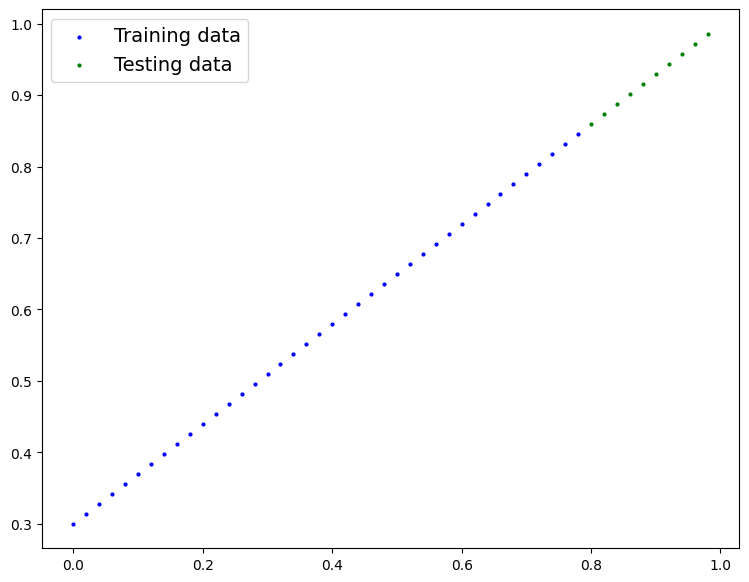

In [ ]:
plot_predictions()

## Build the model

In [ ]:
class LinearRegressionModel(nn.Module):
    """
    Almost every pytorch model subclasses nn.Module
    """
    def __init__(self):
        super().__init__() # inherits attributes and methods from nn.Module
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias


### Pytorch model building essentials

- torch.nn: contains the components to build computational graphs. A neural network is a directed acyclic graph
- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module: The base class for all neural network modules, if you subclass it you should overwrite forward()
- torch.optim: diffrent types of optimization algorithms for gradient descent

## Check the model contents

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making the prediction using `torch.inference_mode()`

- When we pass data thorugh our model it's going to run it trhough the `forward()` method
https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html

In [ ]:
model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# make predictions with model
# with torch.inference removes the gradient tracking as
# it is not required while getting the predictions on the test set since we are not training
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

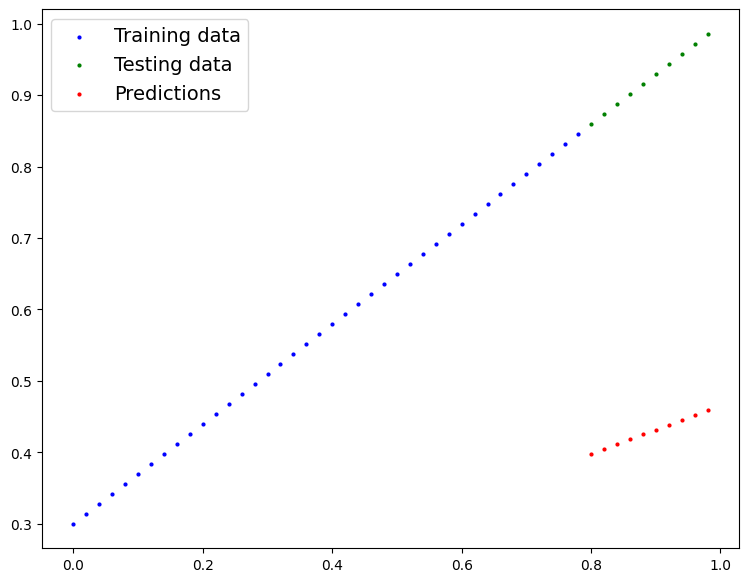

In [ ]:
plot_predictions(predictions=y_preds)

## Training Intuition